# Comparison Before, During and After WWII

Using the merged dataset (complete_dataset) containing all of the collected data over the period of 1893-1963 by Mona Allaert, Elisabeth Jansen and me to look at the changes in productions and performances.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette("Set2")

df = pd.read_csv('complete_dataset.csv', encoding='utf-8', index_col=False)
# Strip leading and trailing whitespaces
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue
# Removing redundant columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Image,Collection,Production,Date,Occasion,Multiple Bill,Performance_ID,Normalized Title,Original Language,Composer,Original Premiere,Original Title,Genre,Season,Directors,Title Language,Leaflet Language
0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,903641,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN
1,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,316913,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN
2,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,135474,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN
3,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,520507,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN
4,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,446314,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN


## Absolute Frequency of Performances

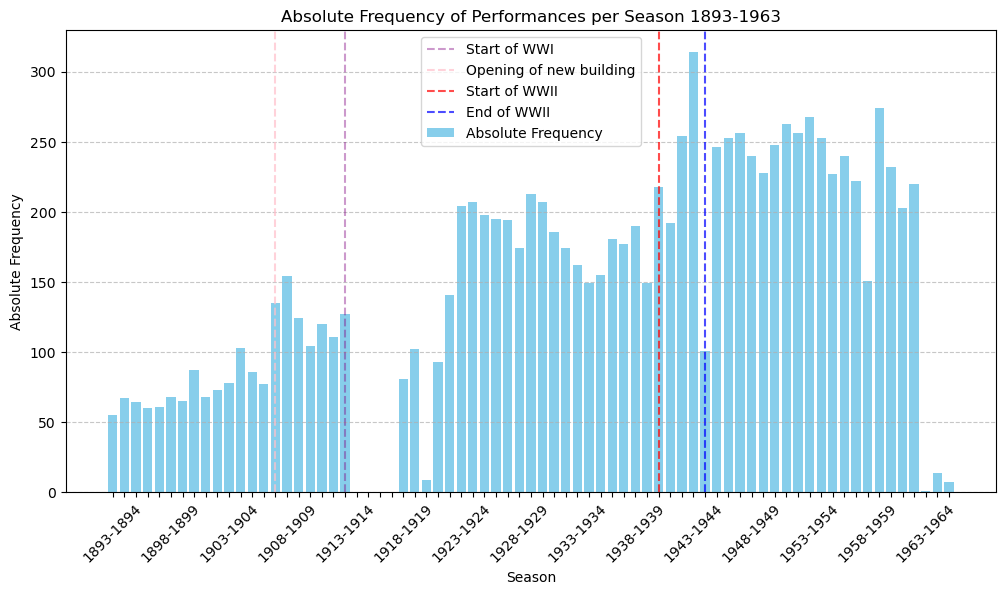

In [2]:
# First looking at the complete dataset 1893-1963

# Count the number of performances per season
season_counts = df['Season'].value_counts().sort_index()

# Add zero counts for the period when the opera was closed
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
season_counts = season_counts.reindex(season_counts.index.union(closed_seasons), fill_value=0)

plt.figure(figsize=(12, 6))
plt.bar(season_counts.index, season_counts.values, color='skyblue', label='Absolute Frequency')

# Add vertical lines for the markers
plt.axvline(x=20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=season_counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')
plt.axvline(x=season_counts.index.get_loc('1944-1945'), color='blue', alpha=0.7, linestyle='--', label='End of WWII')

plt.xlabel('Season')
plt.ylabel('Absolute Frequency')
plt.title('Absolute Frequency of Performances per Season 1893-1963')

# Show ticks every 5 years
x_ticks = [season_counts.index[i] if i % 5 == 0 else '' for i in range(len(season_counts.index))]
plt.xticks(season_counts.index, x_ticks, rotation=45)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

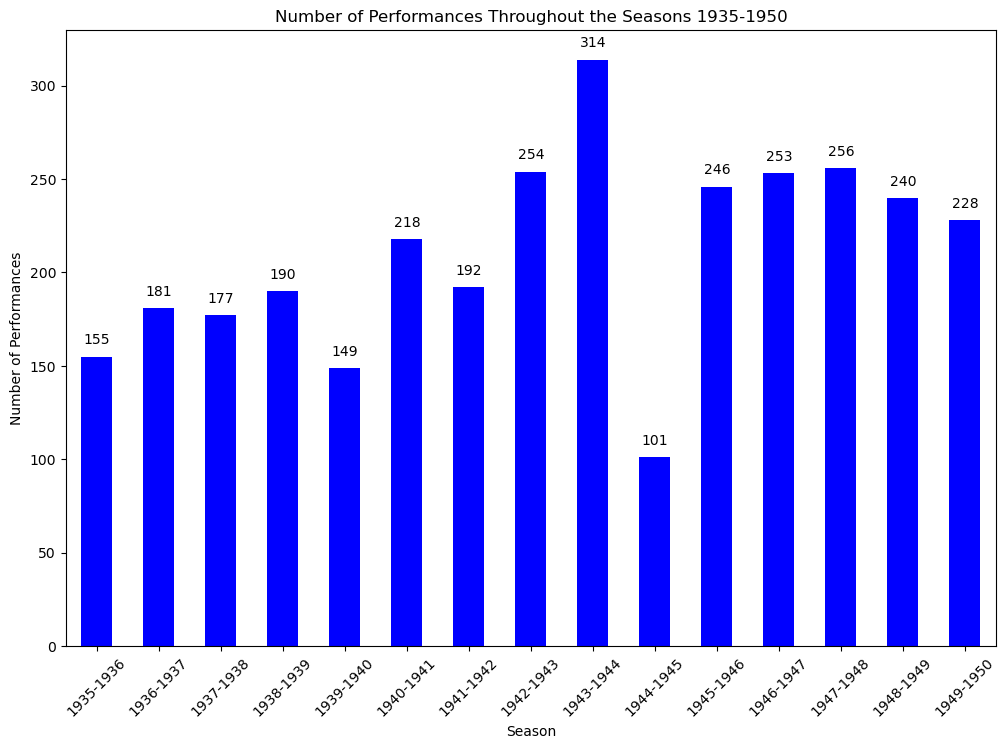

In [3]:
# Five years before, during and after WWII
title_counts = df['Season'].value_counts().reindex(['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945', '1945-1946', '1946-1947', '1947-1948', '1948-1949', '1949-1950'])
plt.figure(figsize=(12, 8))
bars = title_counts.plot(kind='bar', color='blue')

for bar, value in zip(bars.patches, title_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom')

plt.title('Number of Performances Throughout the Seasons 1935-1950')
plt.xlabel('Season')
plt.ylabel('Number of Performances')
plt.xticks(rotation=45)
plt.show()

## Ratio of Performances

Looking at the period spanning over 1935-1950, 5 years before and after WWII included.

In [4]:
# Overall

# Count performances per season
season_counts = df.groupby('Season')['Performance_ID'].count()

# Calculate the ratio and percentage
ratio = season_counts['1935-1936':'1939-1940'].sum() / season_counts['1946-1947':'1949-1950'].sum()
percentage_ratio = ratio * 100

print(f"Ratio: {ratio}\nPercentage: {percentage_ratio:.2f}%")

Ratio: 0.872057318321392
Percentage: 87.21%


In [5]:
# Before and during WWII
season_counts = df.groupby('Season')['Performance_ID'].count()


ratio = season_counts['1935-1936':'1939-1940'].sum() / season_counts['1940-1941':'1945-1946'].sum()
percentage_ratio = ratio * 100

print(f"Ratio: {ratio}\nPercentage: {percentage_ratio:.2f}%")

Ratio: 0.6430188679245283
Percentage: 64.30%


In [6]:
# During and after WWII
season_counts = df.groupby('Season')['Performance_ID'].count()


ratio = season_counts['1940-1941':'1945-1946'].sum() / season_counts['1946-1947':'1949-1950'].sum()
percentage_ratio = ratio * 100

print(f"Ratio: {ratio}\nPercentage: {percentage_ratio:.2f}%")

Ratio: 1.3561924257932447
Percentage: 135.62%


In [7]:
# Define the seasons for before, during and after WWII
seasons_before_war = ['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940']
seasons_during_war = ['1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945']
seasons_after_war = ['1945-1946', '1946-1947', '1947-1948', '1948-1949', '1949-1950']

# Count the number of unique performances for each period
unique_performances_before_war = df[df['Season'].isin(seasons_before_war)]['Performance_ID'].nunique()
unique_performances_during_war = df[df['Season'].isin(seasons_during_war)]['Performance_ID'].nunique()
unique_performances_after_war = df[df['Season'].isin(seasons_after_war)]['Performance_ID'].nunique()

# Print the counts
print("Number of unique performances before WWII:", unique_performances_before_war)
print("Number of unique performances during WWII:", unique_performances_during_war)
print("Number of unique performances after WWII:", unique_performances_after_war)

Number of unique performances before WWII: 722
Number of unique performances during WWII: 964
Number of unique performances after WWII: 1107


In [8]:
from scipy.stats import chi2_contingency

# Performances before and after the war
performances = np.array([[722, 1327]])

# Perform chi-squared test
chi_squared, p_value, _, _ = chi2_contingency(performances)

print(f"The chi-squared statistic is {chi_squared}")
print(f"The p-value is {p_value}")

The chi-squared statistic is 0.0
The p-value is 1.0


## Absolute Frequency of Productions

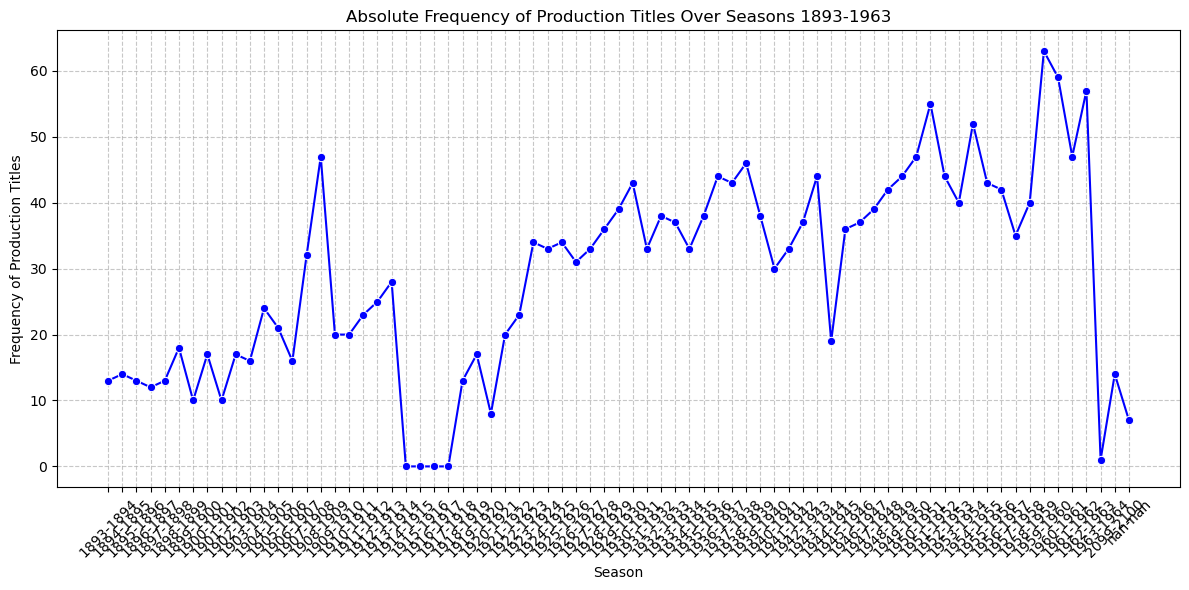

In [9]:
# First looking at the complete dataset 1893-1963

seasons = season_counts.index
frequency = season_counts.values

# Closed seasons
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']

# Group by Season and count unique Normalised title
season_counts = df.groupby('Season')['Normalized Title'].nunique().reset_index()

# Create a DataFrame for closed seasons with zero counts
closed_season_df = pd.DataFrame({'Season': closed_seasons, 'Normalized Title': 0})

# Concatenate the closed seasons DataFrame with the original season_counts
combined_season_counts = pd.concat([season_counts, closed_season_df], ignore_index=True)

# Sort the combined data based on the 'Season' column
combined_season_counts = combined_season_counts.sort_values(by='Season')

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_season_counts, x='Season', y='Normalized Title', marker='o', color='b')
plt.title('Absolute Frequency of Production Titles Over Seasons 1893-1963')
plt.xlabel('Season')
plt.ylabel('Frequency of Production Titles')
plt.xticks(rotation=45)  
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

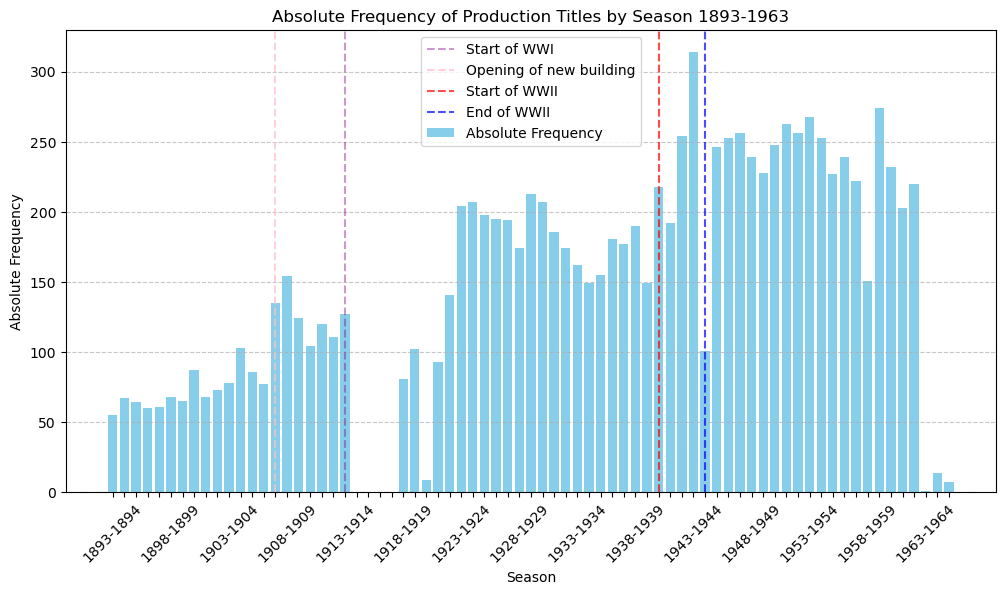

In [10]:
# Plot the absolute frequency using a bar plot
season_counts = df.groupby('Season')['Normalized Title'].count()

# Add zero counts for the closed seasons
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
season_counts = season_counts.reindex(season_counts.index.union(closed_seasons), fill_value=0).sort_index()

seasons = season_counts.index
frequency = season_counts.values

# Plot
plt.figure(figsize=(12, 6))
plt.bar(season_counts.index, season_counts.values, color='skyblue', label='Absolute Frequency')

# Add vertical lines for the markers
plt.axvline(x=20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=season_counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')
plt.axvline(x=season_counts.index.get_loc('1944-1945'), color='blue', alpha=0.7, linestyle='--', label='End of WWII')

plt.xlabel('Season')
plt.ylabel('Absolute Frequency')
plt.xticks(rotation=45)  

plt.title('Absolute Frequency of Production Titles by Season 1893-1963')
# Show ticks every 5 years
x_ticks = [seasons[i] if i % 5 == 0 else '' for i in range(len(seasons))]
plt.xticks(seasons, x_ticks, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Ratio of Productions

Looking at the period spanning over 1935-1950, 5 years before and after WWII included.

In [11]:
# Overall

ratio = season_counts['1935-1936':'1939-1940'].sum() / season_counts['1946-1947':'1949-1950'].sum()
percentage_ratio = ratio * 100

print(f"Ratio: {ratio}\nPercentage: {percentage_ratio:.2f}%")

Ratio: 0.8729508196721312
Percentage: 87.30%


In [12]:
# Before and during WWII

ratio = season_counts['1935-1936':'1939-1940'].sum() / season_counts['1940-1941':'1945-1946'].sum()
percentage_ratio = ratio * 100

print(f"Ratio: {ratio}\nPercentage: {percentage_ratio:.2f}%")

Ratio: 0.6430188679245283
Percentage: 64.30%


In [13]:
# During and after WWII

ratio = season_counts['1940-1941':'1945-1946'].sum() / season_counts['1946-1947':'1949-1950'].sum()
percentage_ratio = ratio * 100

print(f"Ratio: {ratio}\nPercentage: {percentage_ratio:.2f}%")

Ratio: 1.3575819672131149
Percentage: 135.76%


In [14]:
# Count the number of unique titles for each period
titles_before_war = df[df['Season'].isin(seasons_before_war)]['Normalized Title'].nunique()
titles_during_war = df[df['Season'].isin(seasons_during_war)]['Normalized Title'].nunique()
titles_after_war = df[df['Season'].isin(seasons_after_war)]['Normalized Title'].nunique()

print("Number of unique titles before WWII:", titles_before_war)
print("Number of unique titles during WWII:", titles_during_war)
print("Number of unique titles after WWII:", titles_after_war)

Number of unique titles before WWII: 124
Number of unique titles during WWII: 82
Number of unique titles after WWII: 112


In [15]:
# Performances before and after the war
performances = np.array([[124, 143]])

# Perform chi-squared test
chi_squared, p_value, _, _ = chi2_contingency(performances)

print(f"The chi-squared statistic is {chi_squared}")
print(f"The p-value is {p_value}")

The chi-squared statistic is 0.0
The p-value is 1.0


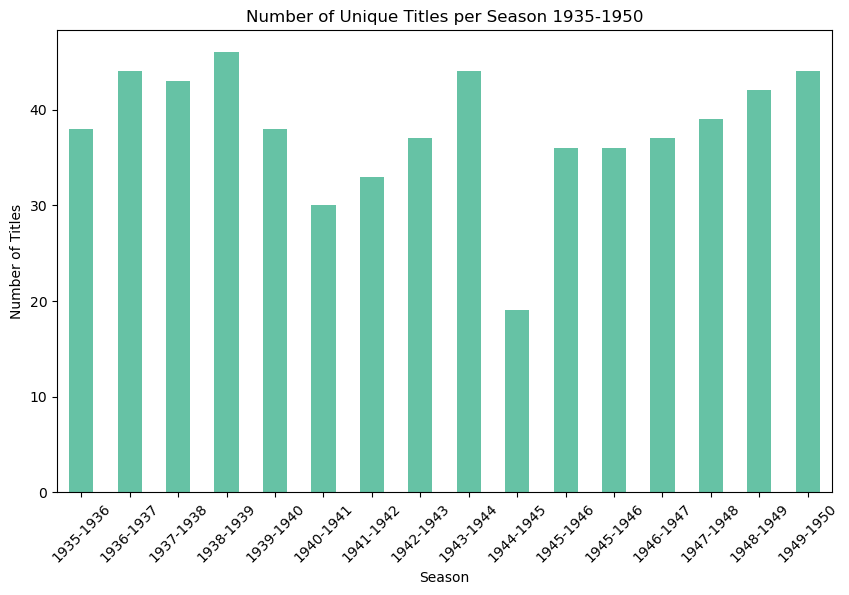

In [16]:
# Group by 'Season' and count unique 'Normalized Title'
title_counts = df.groupby('Season')['Normalized Title'].nunique().reindex(['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945', '1945-1946', '1945-1946', '1946-1947', '1947-1948', '1948-1949', '1949-1950'])

# Create a bar plot
plt.figure(figsize=(10, 6))
title_counts.plot(kind='bar')
plt.title('Number of Unique Titles per Season 1935-1950')
plt.xlabel('Season')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()